In [21]:
import numpy

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from statistics import mean, stdev
from sklearn.preprocessing import scale 
from keras.utils import to_categorical
from sklearn import metrics

In [2]:
SOXL = pd.read_csv('soxl_new.csv') #ETF growth cycle
TQQQ = pd.read_csv('tqqq_new.csv') #3X Index
MU = pd.read_csv('mu_new.csv') #high Beta
AMD = pd.read_csv('amd_new.csv') # high beta
NFLX = pd.read_csv('nflx_new.csv') #High growth
AMZN = pd.read_csv('amzn_new.csv') #High growth
V = pd.read_csv('visa_new.csv') #low volalitity
NVDA = pd.read_csv('nvda_new.csv') #high growth





In [3]:
NFLX['tar_3best_class'].unique()

array(['abv_1.07', 'abv_1.04', 'abv_1.02', 'bel_1.02'], dtype=object)

In [4]:
features = ['Day_previous_roi','ma10','rsi10','ma20','rsi20','ma_chg20',
            'ma60','rsi60','ma200','rsi200','obv','macd_diff','ma_chg10',
            'macd_diff_hist','aroon_diff','slope60','r_sqr_60','ma_chg60',
            'slope10','r_sqr_10','slope5','r_sqr_5','stDev20','ma_chg200',
            'rsi_chg10','rsi_chg20','rsi_chg60','rsi_chg200',
            'percent_down','sine','leadsine','tsf10','tsf20','tsf60','tsf200',
            'up_dwn_prev','shawman','hammer','semi_pk_pr']
top_feats = ['ma200',               
             'macd_diff_hist',      
             'tsf200',              
             'r_sqr_60',            
              'slope60']#,             
#              'macd_diff',           
#              'tsf60',               
#              'slope10',             
#              'r_sqr_10',            
#              'percent_down',        
#              'rsi60',               
#              'obv']
#Set stock or dataframe
df_cln = NFLX
target_name = 'tar_3best_class'
#.75 make a 25/75 split
stop = round(.80*len(df_cln))

#set features

features = df_cln[features].values
top_features = df_cln[top_feats].values
targets = df_cln[target_name].values
arr = []
end = targets.shape[0]
for i in range(end):
    #print(targets[i])
    if targets[i] == 'bel_1.02':
        arr.append([1,0,0,0])
    elif targets[i] == 'abv_1.02':
        arr.append([0,1,0,0])
    elif targets[i] == 'abv_1.04':
        arr.append([0,0,1,0])
    elif targets[i] == 'abv_1.07':
        arr.append([0,0,0,1])
target_int = arr

feature_train = features[:stop]
feature_test = features[stop:]

top_feat_train  = top_features[:stop]
top_feat_test = top_features[stop:]

target_test_int = target_int[stop:]
target_train_int = target_int[:stop]


#set my targets


# feature_train = np.array(feature_train)
# target_train = np.array(target_train)
# feature_test = np.array(feature_test)
# target_test = np.array(target_test)


feature_train.reshape(feature_train.shape[0], 
                      feature_train.shape[1],
                      1).astype( 'float32' )

feature_test.reshape(feature_test.shape[0], 
                      feature_test.shape[1],
                      1).astype( 'float32' )
#print(feature_train.shape,target_train.shape)



array([[[ 1.017512  ],
        [ 0.94859576],
        [68.282555  ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.9890316 ],
        [ 0.9737122 ],
        [64.542854  ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 1.0057704 ],
        [ 0.9915572 ],
        [62.478878  ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       ...,

       [[ 0.96699005],
        [ 1.0701464 ],
        [21.292788  ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.98630136],
        [ 1.0273151 ],
        [35.765232  ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 1.0519959 ],
        [ 0.9919561 ],
        [46.111443  ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]], dtype=float32)

In [5]:
# from keras.utils.np_utils import to_categorical

# categorical_labels = to_categorical(target_int, num_classes=4)
# categorical_labels
#target_train_int

In [6]:
# # Standardize the train and test features
# scaled_train_features = scale(feature_train)
# scaled_test_features = scale(feature_test)
# # Create the model
# def baseline_model():
#     model_1 = Sequential()
#     model_1.add(Dense(200, input_dim=scaled_train_features.shape[1], activation='relu'))
#     #model_1.add(Dropout(0.25))
#     model_1.add(Dense(200, activation='relu'))
#     #model_1.add(Dropout(0.25))
#     model_1.add(Dense(100, activation='relu'))
#     model_1.add(Dense(10, activation='relu'))
#     model_1.add(Dense(4, activation='softmax'))
    
#     model_1.compile(loss= 'categorical_crossentropy' ,
#                 optimizer= 'adam' ,
#                 metrics=[ 'accuracy' ])
#     return model_1

# # Fit the model

# history = KerasClassifier(build_fn=baseline_model, epochs=40, batch_size=200, verbose=True)  


In [7]:
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# results = cross_val_score(history,scaled_train_features , target_train, cv=kfold)
# print(results.mean())

# %matplotlib inline
# plt.plot(history.history['acc'],'b') 
# plt.plot(history.history['val_acc'],'r')
# plt.show()

In [8]:
# model = baseline_model()
# model.fit(feature_train,target_train, epochs=40, verbose=2)

In [9]:
# target_test.unique()
# Standardize the train and test features
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(feature_train)
X_test = min_max_scaler.fit_transform(feature_test)


In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
top_X_train = min_max_scaler.fit_transform(top_feat_train)
top_X_test = min_max_scaler.fit_transform(top_feat_test)


In [11]:
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Model, load_model
import keras.backend as K
from keras.callbacks import ModelCheckpoint

In [22]:
# Standardize the train and test features
K.clear_session()
target_test = np.array(target_test_int)
target_train = np.array(target_train_int)
# scaled_train_features = scale(feature_train)
# scaled_test_features = scale(feature_test)
# Create the model
K.clear_session()

inputs = Input(shape=(top_X_train.shape[1], ))
x1 = Dense(128)(inputs)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)
x1 = Dropout(0.5)(x1)

# x2 = Dense(16, activation='relu')(x1)
# x2 = BatchNormalization()(x2)
# x2 = Activation('relu')(x2)

# x3 = Dense(16, activation='relu')(x2)
# x3 = BatchNormalization()(x3)
# x3 = Activation('relu')(x3)

# x4 = Dense(8, activation='relu')(x3)
# x4 = BatchNormalization()(x4)
# x4 = Activation('relu')(x4)

# x5 = Dense(16, activation='relu')(x4)
# x5 = BatchNormalization()(x5)
# x5 = Activation('relu')(x5)


# x6 = Dense(32, activation='relu')(x5)
# x6 = BatchNormalization()(x6)
# x6 = Activation('relu')(x6)


# x7 = Dense(64, activation='relu')(x6)
# x7 = BatchNormalization()(x7)
# x7 = Activation('relu')(x7)

x = Dense(4, activation='softmax')(x1)

checkpoint = ModelCheckpoint('3_layer_dense.h5',
                             monitor='val_loss',
                             save_best_only=True)
cb = [checkpoint]

# this compiles our model so it is ready to fit
model = Model(inputs, x)
model.compile(loss= 'categorical_crossentropy' ,
                optimizer= 'adam' ,
                metrics=[ 'accuracy' ])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               768       
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 516       
Total params: 1,796
Trainable params: 1,540
Non-trainable params: 256
_________________________________________________________________


In [13]:
2**7

128

In [14]:
#target_test = categorical_labels[stop:]
#target_train = categorical_labels[:stop]
# we actually fit the model here
history = model.fit(top_X_train,
                    target_train,
                    epochs=100,
                    validation_split=0.15,
                    callbacks=cb,
                    batch_size=200)

Train on 2645 samples, validate on 467 samples
Epoch 1/100
2645/2645 [==============================] - 1s 494us/step - loss: 1.6835 - acc: 0.2469 - val_loss: 1.4954 - val_acc: 0.1349
Epoch 2/100
2645/2645 [==============================] - 0s 50us/step - loss: 1.5413 - acc: 0.2563 - val_loss: 1.4504 - val_acc: 0.2441
Epoch 3/100
2645/2645 [==============================] - 0s 30us/step - loss: 1.5222 - acc: 0.2699 - val_loss: 1.4023 - val_acc: 0.2719
Epoch 4/100
2645/2645 [==============================] - 0s 51us/step - loss: 1.5103 - acc: 0.2665 - val_loss: 1.4080 - val_acc: 0.2463
Epoch 5/100
2645/2645 [==============================] - 0s 76us/step - loss: 1.5254 - acc: 0.2480 - val_loss: 1.4041 - val_acc: 0.2355
Epoch 6/100
2645/2645 [==============================] - 0s 77us/step - loss: 1.4828 - acc: 0.2677 - val_loss: 1.3979 - val_acc: 0.2334
Epoch 7/100
2645/2645 [==============================] - 0s 53us/step - loss: 1.4722 - acc: 0.2817 - val_loss: 1.3723 - val_acc: 0.2655


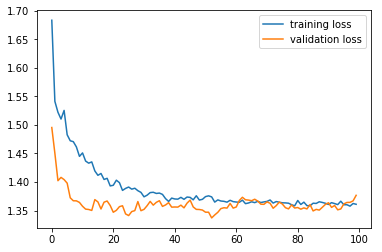

In [15]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

In [24]:
history = model.fit(top_X_train,
                    target_train,
                    epochs=100,
                    validation_split=0.15,
                    callbacks=cb,
                    batch_size=200)
target_pred = model.predict(top_X_test)

print("Accuracy:",metrics.accuracy_score(target_test_int, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(target_test_int, target_pred),'\n'
      'Train ACC:', metrics.accuracy_score(target_train_int, target_pred), '\n'
      "Confusion Matrix:",'\n',
      metrics.confusion_matrix(target_test, target_pred))




Train on 2645 samples, validate on 467 samples
Epoch 1/100
2645/2645 [==============================] - 0s 100us/step - loss: 1.3597 - acc: 0.3267 - val_loss: 1.3933 - val_acc: 0.2848
Epoch 2/100
2645/2645 [==============================] - 0s 76us/step - loss: 1.3601 - acc: 0.3301 - val_loss: 1.4073 - val_acc: 0.2698
Epoch 3/100
2645/2645 [==============================] - 0s 75us/step - loss: 1.3571 - acc: 0.3391 - val_loss: 1.4067 - val_acc: 0.2441
Epoch 4/100
2645/2645 [==============================] - 0s 75us/step - loss: 1.3622 - acc: 0.3353 - val_loss: 1.4056 - val_acc: 0.2698
Epoch 5/100
2645/2645 [==============================] - 0s 77us/step - loss: 1.3548 - acc: 0.3323 - val_loss: 1.4057 - val_acc: 0.2612
Epoch 6/100
2645/2645 [==============================] - 0s 77us/step - loss: 1.3600 - acc: 0.3327 - val_loss: 1.4061 - val_acc: 0.2741
Epoch 7/100
2645/2645 [==============================] - 0s 77us/step - loss: 1.3611 - acc: 0.3263 - val_loss: 1.3981 - val_acc: 0.2762


ValueError: Classification metrics can't handle a mix of multiclass-multioutput and continuous-multioutput targets

In [25]:
target_pred

array([[0.18847424, 0.20657857, 0.26712638, 0.3378208 ],
       [0.19909625, 0.21071649, 0.25854376, 0.3316435 ],
       [0.20781128, 0.21539953, 0.2511966 , 0.32559255],
       ...,
       [0.19012035, 0.07394086, 0.22188143, 0.51405734],
       [0.35369614, 0.09347692, 0.19233045, 0.3604965 ],
       [0.52052873, 0.10334933, 0.14951088, 0.22661106]], dtype=float32)

In [104]:
target_train_int

[[0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 1, 0,

In [105]:
targets = df_cln[target_name].values
targ_test = targets[stop:]
targ_train = targets[:stop]
targ_train[0:10]

array(['abv_1.07', 'abv_1.07', 'abv_1.07', 'abv_1.04', 'abv_1.02',
       'bel_1.02', 'abv_1.07', 'abv_1.07', 'abv_1.07', 'abv_1.07'],
      dtype=object)

In [111]:
history.predict_classes(feature_test)

AttributeError: 'History' object has no attribute 'predict_classes'

In [ ]:
top_X_train,
                    target_train,
                    epochs=100,
                    validation_split=0.15,
                    callbacks=cb,
                    batch_size=200